# Ml Based Regression to Model Insurance Premium

![Steps for Premium Calculation](Insurance.png)

In [2]:
#!pip install arff 

import pandas as pd 
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 


In [3]:
import arff
data_freq = arff.load('freMTPL2freq.arff') 
df_freq = pd.DataFrame(data_freq, columns=["IDpol", "ClaimNb", "Exposure", "Area", "VehPower", "VehAge","DrivAge", "BonusMalus", "VehBrand", "VehGas", "Density", "Region"])
df_freq.head()
df_freq.info()
df_freq.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 entries, 0 to 678012
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IDpol       678013 non-null  float64
 1   ClaimNb     678013 non-null  float64
 2   Exposure    678013 non-null  float64
 3   Area        678013 non-null  object 
 4   VehPower    678013 non-null  float64
 5   VehAge      678013 non-null  float64
 6   DrivAge     678013 non-null  float64
 7   BonusMalus  678013 non-null  float64
 8   VehBrand    678013 non-null  object 
 9   VehGas      678013 non-null  object 
 10  Density     678013 non-null  float64
 11  Region      678013 non-null  object 
dtypes: float64(8), object(4)
memory usage: 62.1+ MB


,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density
count,6.780130e+05,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000
mean,2.621857e+06,0.053247,0.528750,6.454631,7.044265,45.499122,59.761502,1792.422405
std,1.641783e+06,0.240117,0.364442,2.050906,5.666232,14.137444,15.636658,3958.646564
min,1.000000e+00,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,1.000000
25%,1.157951e+06,0.000000,0.180000,5.000000,2.000000,34.000000,50.000000,92.000000
50%,2.272152e+06,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,393.000000
75%,4.046274e+06,0.000000,0.990000,7.000000,11.000000,55.000000,64.000000,1658.000000
max,6.114330e+06,16.000000,2.010000,15.000000,100.000000,100.000000,230.000000,27000.000000


In [4]:
data_sev = arff.load('freMTPL2sev.arff') 
df_sev = pd.DataFrame(data_sev, columns=["IDpol", "PurePremium"])
df_sev.head()
df_sev.info()
df_sev.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26639 entries, 0 to 26638
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IDpol        26639 non-null  float64
 1   PurePremium  26639 non-null  float64
dtypes: float64(2)
memory usage: 416.4 KB


,IDpol,PurePremium
count,2.663900e+04,2.663900e+04
mean,2.279864e+06,2.278536e+03
std,1.577202e+06,2.929748e+04
min,1.390000e+02,1.000000e+00
25%,1.087642e+06,6.868100e+02
50%,2.137413e+06,1.172000e+03
75%,3.180162e+06,1.228080e+03
max,6.113971e+06,4.075401e+06


In [5]:
# Merge the dataframes on the common 'IDpol' values
combined_df = pd.merge(df_freq, df_sev, on='IDpol')

In [6]:
# Print the information about the combined dataframe
combined_df.head()
combined_df.info()
combined_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26444 entries, 0 to 26443
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IDpol        26444 non-null  float64
 1   ClaimNb      26444 non-null  float64
 2   Exposure     26444 non-null  float64
 3   Area         26444 non-null  object 
 4   VehPower     26444 non-null  float64
 5   VehAge       26444 non-null  float64
 6   DrivAge      26444 non-null  float64
 7   BonusMalus   26444 non-null  float64
 8   VehBrand     26444 non-null  object 
 9   VehGas       26444 non-null  object 
 10  Density      26444 non-null  float64
 11  Region       26444 non-null  object 
 12  PurePremium  26444 non-null  float64
dtypes: float64(9), object(4)
memory usage: 2.8+ MB


,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,PurePremium
count,2.644400e+04,26444.000000,26444.000000,26444.000000,26444.000000,26444.000000,26444.000000,26444.000000,2.644400e+04
mean,2.280004e+06,1.139427,0.691791,6.464415,7.355090,45.121502,65.231054,2015.302942,2.265513e+03
std,1.583004e+06,0.617563,0.313213,2.017260,5.165475,14.694677,20.143480,4162.639153,2.937103e+04
min,1.390000e+02,1.000000,0.002740,4.000000,0.000000,18.000000,50.000000,2.000000,1.000000e+00
25%,1.086381e+06,1.000000,0.450000,5.000000,3.000000,34.000000,50.000000,115.000000,6.859925e+02
50%,2.133756e+06,1.000000,0.760000,6.000000,7.000000,45.000000,55.000000,524.500000,1.172000e+03
75%,3.183953e+06,1.000000,1.000000,7.000000,11.000000,54.000000,76.000000,2252.000000,1.212385e+03
max,6.113971e+06,16.000000,2.000000,15.000000,99.000000,99.000000,228.000000,27000.000000,4.075401e+06


In [7]:
# Create the new column "PurePremium" by dividing "PurePremium" by "Exposure"
combined_df['PurePremium'] = combined_df['PurePremium'] / combined_df['Exposure']

In [8]:
# Create the new column "Frequency" by dividing "ClaimNb" by "Exposure"
combined_df['Frequency'] = combined_df['ClaimNb'] / combined_df['Exposure']

In [9]:
# Remove the columns 
combined_df.pop('IDpol')
combined_df.pop('ClaimNb')
combined_df.pop('Exposure')

0        0.75
1        0.14
2        0.14
3        0.62
4        0.62
         ... 
26439    0.14
26440    0.17
26441    0.17
26442    0.17
26443    0.13
Name: Exposure, Length: 26444, dtype: float64

In [10]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26444 entries, 0 to 26443
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         26444 non-null  object 
 1   VehPower     26444 non-null  float64
 2   VehAge       26444 non-null  float64
 3   DrivAge      26444 non-null  float64
 4   BonusMalus   26444 non-null  float64
 5   VehBrand     26444 non-null  object 
 6   VehGas       26444 non-null  object 
 7   Density      26444 non-null  float64
 8   Region       26444 non-null  object 
 9   PurePremium  26444 non-null  float64
 10  Frequency    26444 non-null  float64
dtypes: float64(7), object(4)
memory usage: 2.4+ MB


In [11]:
y_premium_column = combined_df.pop('PurePremium')
combined_df['PurePremium'] = y_premium_column

In [12]:
print("Missing values:\n", combined_df.isnull().sum())

Missing values:
 Area           0
VehPower       0
VehAge         0
DrivAge        0
BonusMalus     0
VehBrand       0
VehGas         0
Density        0
Region         0
Frequency      0
PurePremium    0
dtype: int64


In [13]:
import numpy as np

# Calculate the Z-score for 'PurePremium' column
z_scores = np.abs((combined_df['PurePremium'] - combined_df['PurePremium'].mean()) / combined_df['PurePremium'].std())

# Define the threshold for outliers (e.g., Z-score greater than 3)
threshold = 3

# Find the indices of outliers
outlier_indices = np.where(z_scores > threshold)[0]

# Create a DataFrame containing only the outliers
df_outliers = combined_df.iloc[outlier_indices]

# Print the shape of the outliers DataFrame
print("Shape of outliers DataFrame:", df_outliers.shape)

df_scaled_cleaned = combined_df.drop(outlier_indices)

combined_df = df_scaled_cleaned.copy()
combined_df.info()

Shape of outliers DataFrame: (52, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26392 entries, 0 to 26443
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         26392 non-null  object 
 1   VehPower     26392 non-null  float64
 2   VehAge       26392 non-null  float64
 3   DrivAge      26392 non-null  float64
 4   BonusMalus   26392 non-null  float64
 5   VehBrand     26392 non-null  object 
 6   VehGas       26392 non-null  object 
 7   Density      26392 non-null  float64
 8   Region       26392 non-null  object 
 9   Frequency    26392 non-null  float64
 10  PurePremium  26392 non-null  float64
dtypes: float64(7), object(4)
memory usage: 2.4+ MB


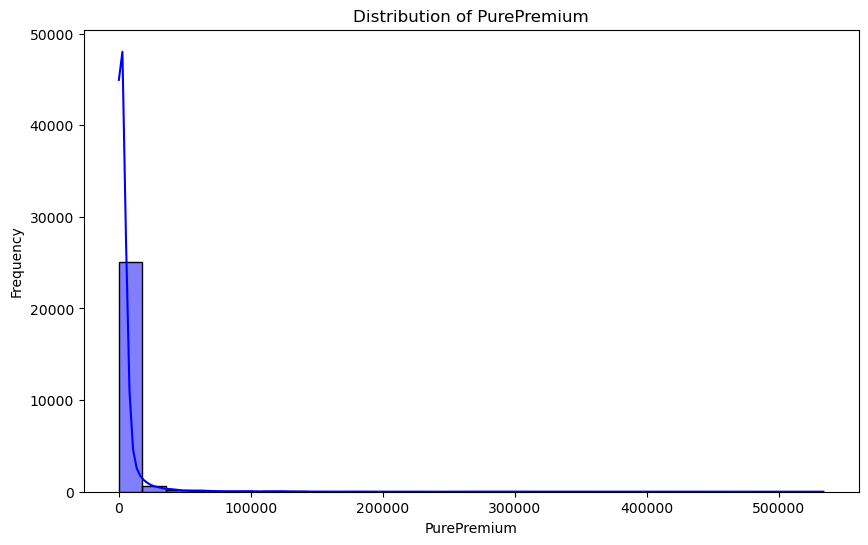

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable 'PurePremium'
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['PurePremium'], bins=30, kde=True, color='blue')
plt.title('Distribution of PurePremium')
plt.xlabel('PurePremium')
plt.ylabel('Frequency')
plt.show()

           VehPower        VehAge       DrivAge    BonusMalus       Density  \
count  26392.000000  26392.000000  26392.000000  26392.000000  26392.000000   
mean       6.464989      7.353706     45.134473     65.219423   2015.224310   
std        2.017877      5.165647     14.688319     20.136631   4162.770803   
min        4.000000      0.000000     18.000000     50.000000      2.000000   
25%        5.000000      3.000000     34.000000     50.000000    115.000000   
50%        6.000000      7.000000     45.000000     55.000000    522.000000   
75%        7.000000     11.000000     54.000000     76.000000   2252.000000   
max       15.000000     99.000000     99.000000    228.000000  27000.000000   

          Frequency   PurePremium  
count  26392.000000  26392.000000  
mean       3.375205      7.392427  
std       10.126151      1.391306  
min        0.500000      0.000000  
25%        1.000000      7.028201  
50%        1.428571      7.265992  
75%        2.564103      8.060719  


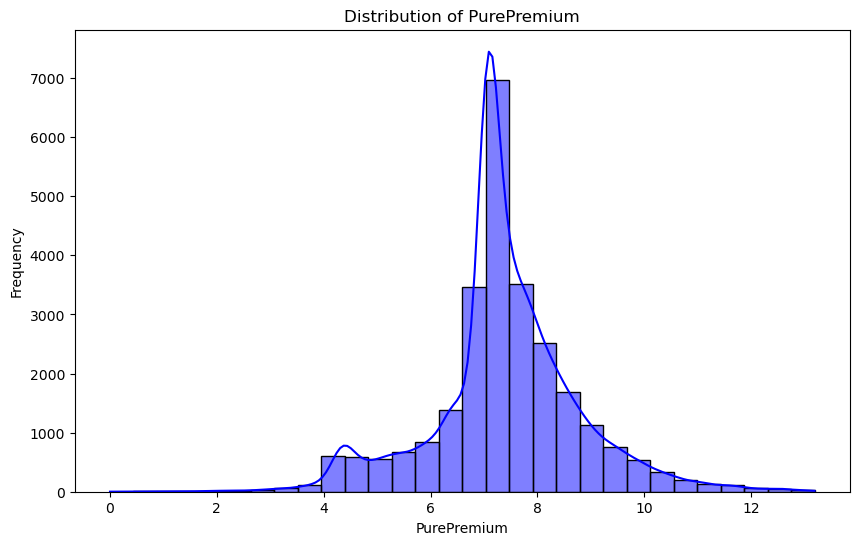

In [15]:
# Log transform the 'PurePremium' column

combined_df['PurePremium'] = np.log(combined_df['PurePremium'])

print(combined_df.describe())

plt.figure(figsize=(10, 6))
sns.histplot(combined_df['PurePremium'], bins=30, kde=True, color='blue')
plt.title('Distribution of PurePremium')
plt.xlabel('PurePremium')
plt.ylabel('Frequency')
plt.show()

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Features to be Normalised
numerical_features = ['Frequency', 'VehPower', 'VehAge', 'DrivAge', 'BonusMalus', 'Density']

# Features to be encoded
columns_to_encode = ['Area', 'VehBrand', 'VehGas', 'Region']

# Copy the DataFrame to avoid modifying the original
data = combined_df.copy()

# Define the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
    ('scaler', StandardScaler())                     # Scale the features
])

# Apply the pipeline to numerical features
data[numerical_features] = pipeline.fit_transform(data[numerical_features])

# Apply one-hot encoding
data = pd.get_dummies(data, columns=columns_to_encode, drop_first=True)


y_premium_column = data.pop('PurePremium')
data['PurePremium'] = y_premium_column

df = data.copy()
df.info()
df.describe()
print("Missing values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26392 entries, 0 to 26443
Data columns (total 44 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   VehPower        26392 non-null  float64
 1   VehAge          26392 non-null  float64
 2   DrivAge         26392 non-null  float64
 3   BonusMalus      26392 non-null  float64
 4   Density         26392 non-null  float64
 5   Frequency       26392 non-null  float64
 6   Area_'B'        26392 non-null  uint8  
 7   Area_'C'        26392 non-null  uint8  
 8   Area_'D'        26392 non-null  uint8  
 9   Area_'E'        26392 non-null  uint8  
 10  Area_'F'        26392 non-null  uint8  
 11  VehBrand_'B10'  26392 non-null  uint8  
 12  VehBrand_'B11'  26392 non-null  uint8  
 13  VehBrand_'B12'  26392 non-null  uint8  
 14  VehBrand_'B13'  26392 non-null  uint8  
 15  VehBrand_'B14'  26392 non-null  uint8  
 16  VehBrand_'B2'   26392 non-null  uint8  
 17  VehBrand_'B3'   26392 non-null 

In [17]:
## Understand std deviation of features
column_std = df.std()
print(column_std)

VehPower          1.000019
VehAge            1.000019
DrivAge           1.000019
BonusMalus        1.000019
Density           1.000019
Frequency         1.000019
Area_'B'          0.299439
Area_'C'          0.443064
Area_'D'          0.429577
Area_'E'          0.421781
Area_'F'          0.168619
VehBrand_'B10'    0.167770
VehBrand_'B11'    0.156151
VehBrand_'B12'    0.365530
VehBrand_'B13'    0.141444
VehBrand_'B14'    0.070279
VehBrand_'B2'     0.437161
VehBrand_'B3'     0.288653
VehBrand_'B4'     0.199337
VehBrand_'B5'     0.242920
VehBrand_'B6'     0.212579
VehGas_Regular    0.499934
Region_'R21'      0.053586
Region_'R22'      0.108256
Region_'R23'      0.090921
Region_'R24'      0.429937
Region_'R25'      0.129604
Region_'R26'      0.113586
Region_'R31'      0.185431
Region_'R41'      0.131842
Region_'R42'      0.058940
Region_'R43'      0.037918
Region_'R52'      0.236610
Region_'R53'      0.256587
Region_'R54'      0.171344
Region_'R72'      0.195813
Region_'R73'      0.117416
R

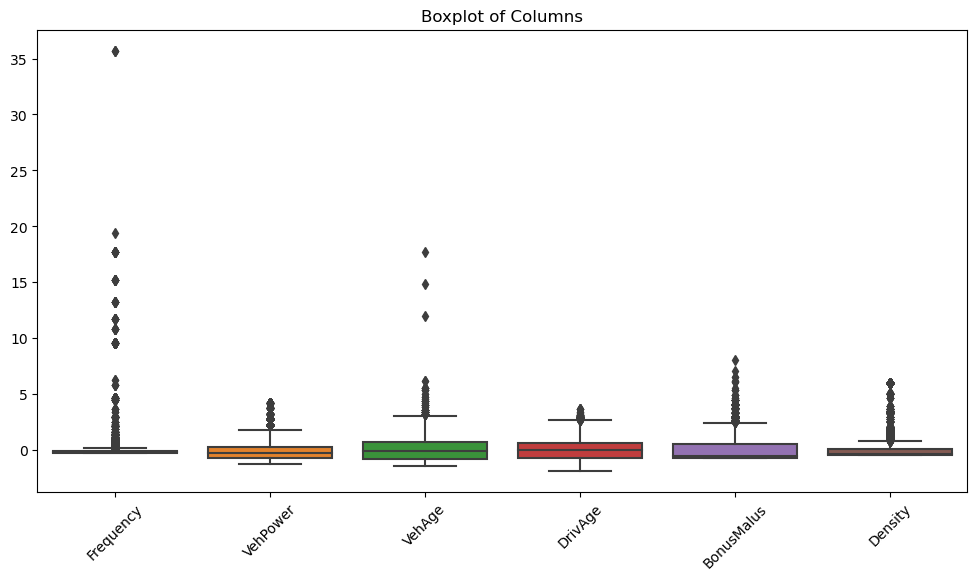

Indices of Outliers: {0, 1, 2, 3, 4, 16385, 12, 16396, 16399, 16, 17, 16400, 16401, 20, 21, 22, 23, 16406, 16410, 27, 16412, 16413, 16414, 30, 32, 33, 34, 35, 36, 16419, 16422, 16423, 16424, 16425, 16426, 43, 16428, 16429, 16432, 49, 50, 16435, 52, 53, 54, 16437, 16439, 57, 16441, 16443, 60, 16446, 63, 16448, 64, 65, 66, 16449, 69, 16452, 71, 16454, 16456, 16457, 76, 16461, 16466, 84, 16469, 86, 87, 16470, 16471, 16472, 16473, 16474, 16476, 16477, 97, 98, 99, 100, 16485, 16486, 101, 102, 103, 16484, 16490, 16494, 16495, 112, 16498, 117, 16501, 16502, 16504, 16503, 16509, 16510, 16513, 16514, 16515, 16518, 16519, 136, 16520, 16521, 16527, 144, 145, 147, 148, 16531, 150, 16532, 16533, 16535, 16538, 16539, 158, 16543, 16544, 16545, 16546, 16547, 168, 16555, 173, 16557, 176, 16562, 16570, 16571, 189, 16573, 16574, 16575, 195, 16584, 16587, 16591, 209, 210, 16593, 16600, 16601, 220, 16606, 16616, 16617, 16624, 254, 257, 16646, 16651, 270, 16656, 282, 283, 16675, 293, 16678, 300, 16684, 1668

In [18]:
# Removing Outliers from numerical features
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
columns_of_interest = ['Frequency', 'VehPower', 'VehAge', 'DrivAge', 'BonusMalus', 'Density']

# Step 1: Boxplot Visualization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns_of_interest])
plt.title('Boxplot of Columns')
plt.xticks(rotation=45)
plt.show()

# Step 2: Z-Score Method
from scipy import stats

z_scores = np.abs(stats.zscore(df[columns_of_interest]))
threshold = 3
outliers_z = np.where(z_scores > threshold)

# Step 3: IQR Method
Q1 = df[columns_of_interest].quantile(0.25)
Q3 = df[columns_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = ((df[columns_of_interest] < lower_bound) | (df[columns_of_interest] > upper_bound)).any(axis=1)

# Combine results
outliers = set(outliers_z[0]) | set(outliers_iqr.index[outliers_iqr])

print("Indices of Outliers:", outliers)

# Remove outliers identified by IQR method
df_no_outliers_iqr = df[~outliers_iqr]
df = df_no_outliers_iqr.copy()

# Print the shape of the original and updated DataFrames to see the difference
print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing outliers (IQR method):", df_no_outliers_iqr.shape)

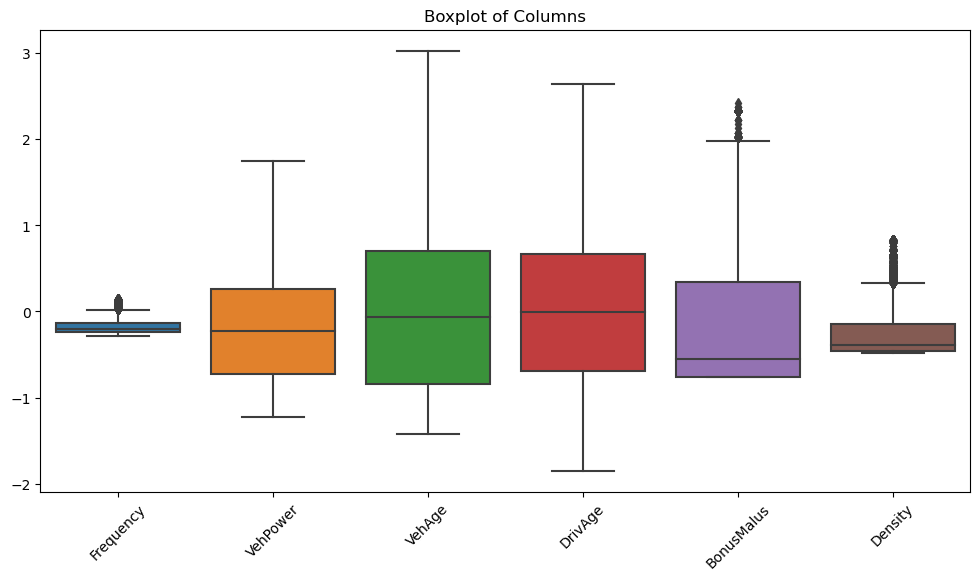

In [19]:
# After removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns_of_interest])
plt.title('Boxplot of Columns')
plt.xticks(rotation=45)
plt.show()

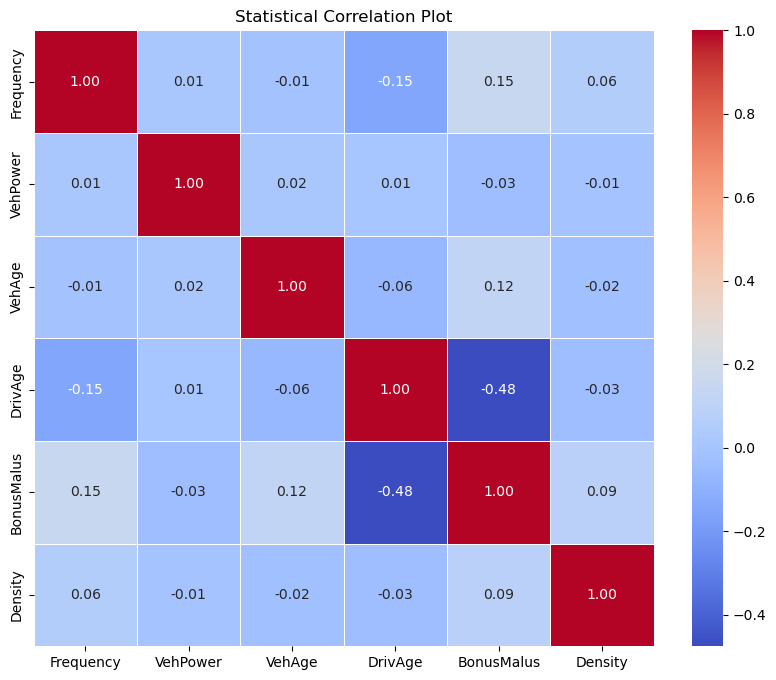

In [20]:
# Find Correlations in Numerical Features

columns_of_interest = ['Frequency', 'VehPower', 'VehAge', 'DrivAge', 'BonusMalus', 'Density']
correlation_matrix = df[columns_of_interest].corr()

# Plotting correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Statistical Correlation Plot')
plt.show()

# Light GBM 

In [21]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, explained_variance_score

# Create an empty list to store results
results_lightgbm_train = []
results_lightgbm_test = []

# Splitting the data into training, validation, and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=0)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=0)

# Using numpy to create arrays of labels and features
y_train_PurePremium = np.array(train_df['PurePremium'])
y_val_PurePremium = np.array(val_df['PurePremium'])
y_test_PurePremium = np.array(test_df['PurePremium'])
train_features = np.array(train_df.iloc[:, 0:43])
val_features = np.array(val_df.iloc[:, 0:43])
test_features = np.array(test_df.iloc[:, 0:43])

# Hyperparameter tuning using validation set
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

dtrain = lgb.Dataset(train_features, label=y_train_PurePremium)
dval = lgb.Dataset(val_features, label=y_val_PurePremium)

# Training the LightGBM model
clf_lightgbm = lgb.train(params,
                         dtrain,
                         num_boost_round=20000,
                         valid_sets=[dval],
                         early_stopping_rounds=10000,
                         verbose_eval=False)

# Predictions on the validation set
y_pred_val = clf_lightgbm.predict(val_features)

# Calculate evaluation metrics for validation set
mae_val = mean_absolute_error(y_val_PurePremium, y_pred_val)
mse_val = mean_squared_error(y_val_PurePremium, y_pred_val)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val_PurePremium, y_pred_val)
medae_val = median_absolute_error(y_val_PurePremium, y_pred_val)
explained_var_val = explained_variance_score(y_val_PurePremium, y_pred_val)

# Store the results for validation set
results_lightgbm_train.append({
    'Mean Absolute Error': mae_val,
    'Mean Squared Error': mse_val,
    'Root Mean Squared Error': rmse_val,
    'R-squared': r2_val,
    'Median Absolute Error': medae_val,
    'Explained Variance Score': explained_var_val
})

# Predictions on the test set
y_pred_test = clf_lightgbm.predict(test_features)

# Calculate evaluation metrics for test set
mae_test = mean_absolute_error(y_test_PurePremium, y_pred_test)
mse_test = mean_squared_error(y_test_PurePremium, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test_PurePremium, y_pred_test)
medae_test = median_absolute_error(y_test_PurePremium, y_pred_test)
explained_var_test = explained_variance_score(y_test_PurePremium, y_pred_test)

# Store the results for test set
results_lightgbm_test.append({
    'Mean Absolute Error': mae_test,
    'Mean Squared Error': mse_test,
    'Root Mean Squared Error': rmse_test,
    'R-squared': r2_test,
    'Median Absolute Error': medae_test,
    'Explained Variance Score': explained_var_test
})

# Convert results to DataFrame
df_results_train = pd.DataFrame(results_lightgbm_train)
df_results_test = pd.DataFrame(results_lightgbm_test)

# Print training error metrics
print("Training Error Metrics:")
print(df_results_train)

# Print testing error metrics
print("\nTesting Error Metrics:")
print(df_results_test)

c:\Users\ADMIN\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\ADMIN\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001257 seconds.
You can set `force_col_wise=true` to remove the overhead.
Training Error Metrics:
   Mean Absolute Error  Mean Squared Error  Root Mean Squared Error  \
0              0.76706            1.270041                 1.126961   

   R-squared  Median Absolute Error  Explained Variance Score  
0   0.170549               0.446007                  0.170558  

Testing Error Metrics:
   Mean Absolute Error  Mean Squared Error  Root Mean Squared Error  \
0             0.739016            1.196616                 1.093899   

   R-squared  Median Absolute Error  Explained Variance Score  
0    0.16097               0.430766                  0.161083  


# Light GBM Further Hyper Parameter Tuning

In [22]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, explained_variance_score

# Splitting the data into training, validation, and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=0)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=0)

# Using numpy to create arrays of labels and features
y_train_PurePremium = np.array(train_df['PurePremium'])
y_val_PurePremium = np.array(val_df['PurePremium'])
y_test_PurePremium = np.array(test_df['PurePremium'])
train_features = np.array(train_df.iloc[:, 0:43])
val_features = np.array(val_df.iloc[:, 0:43])
test_features = np.array(test_df.iloc[:, 0:43])

# Define hyperparameter grid for RandomizedSearchCV
param_grid = {
    'boosting_type': ['gbdt'],
    'objective': ['regression'],
    'metric': ['rmse'],
    'num_leaves': [10, 20, 30, 40, 50],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'feature_fraction': [0.6, 0.7, 0.8, 0.9],
    'bagging_fraction': [0.6, 0.7, 0.8, 0.9],
    'bagging_freq': [3, 5, 7, 10],
}

# Create a LightGBM regressor
lgb_reg = lgb.LGBMRegressor()

# Perform random search with cross-validation
random_search = RandomizedSearchCV(estimator=lgb_reg, param_distributions=param_grid, 
                                   n_iter=50, scoring='neg_mean_squared_error', cv=5, 
                                   verbose=2, random_state=42, n_jobs=-1)

# Fit the random search to the training data
random_search.fit(train_features, y_train_PurePremium)

# Get the best estimator and its hyperparameters
best_estimator = random_search.best_estimator_
best_params = random_search.best_params_

print("Best Hyperparameters:", best_params)

# Predictions on the validation set using the best estimator
y_pred_val = best_estimator.predict(val_features)

# Calculate evaluation metrics for validation set
mae_val = mean_absolute_error(y_val_PurePremium, y_pred_val)
mse_val = mean_squared_error(y_val_PurePremium, y_pred_val)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val_PurePremium, y_pred_val)
medae_val = median_absolute_error(y_val_PurePremium, y_pred_val)
explained_var_val = explained_variance_score(y_val_PurePremium, y_pred_val)

print("\nValidation Error Metrics:")
print("Mean Absolute Error:", mae_val)
print("Mean Squared Error:", mse_val)
print("Root Mean Squared Error:", rmse_val)
print("R-squared:", r2_val)
print("Median Absolute Error:", medae_val)
print("Explained Variance Score:", explained_var_val)

# Predictions on the test set using the best estimator
y_pred_test = best_estimator.predict(test_features)

# Calculate evaluation metrics for test set
mae_test = mean_absolute_error(y_test_PurePremium, y_pred_test)
mse_test = mean_squared_error(y_test_PurePremium, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test_PurePremium, y_pred_test)
medae_test = median_absolute_error(y_test_PurePremium, y_pred_test)
explained_var_test = explained_variance_score(y_test_PurePremium, y_pred_test)

print("\nTesting Error Metrics:")
print("Mean Absolute Error:", mae_test)
print("Mean Squared Error:", mse_test)
print("Root Mean Squared Error:", rmse_test)
print("R-squared:", r2_test)
print("Median Absolute Error:", medae_test)
print("Explained Variance Score:", explained_var_test)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
Best Hyperparameters: {'objective': 'regression', 'num_leaves': 10, 'metric': 'rmse', 'learning_rate': 0.05, 'feature_fraction': 0.6, 'boosting_type': 'gbdt', 'bagging_freq': 5, 'bagging_fraction': 0.7}

Validation Error Metrics:
Mean Absolute Error: 0.7684909466960513
Mean Squared Error: 1.2653173681321452
Root Mean Squared Error: 1.124863266416032
R-squared: 0.17363419912964728
Median Absolute Error: 0.4271470961162045
Explained Variance Score: 0.17363653128766843

Testing Error Metrics:
Mean Absolute Error: 0.7402163492774054
Mean Squared Error: 1.1921064242159778
Root Mean Squar

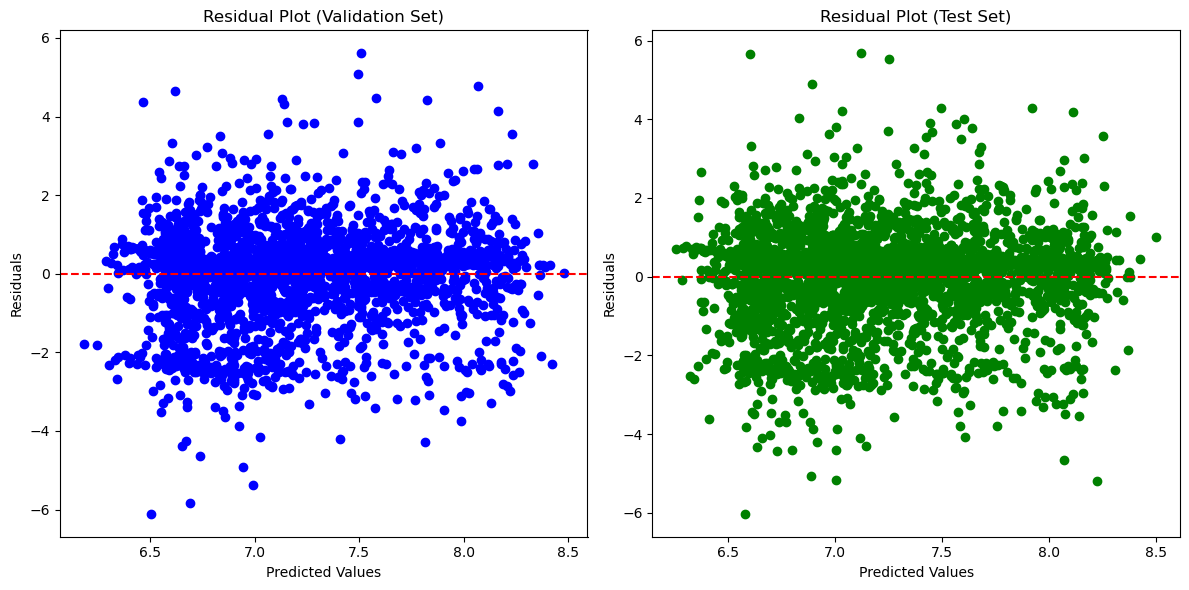

In [23]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals_val = y_val_PurePremium - y_pred_val
residuals_test = y_test_PurePremium - y_pred_test

# Plot residual plots for validation and test sets
plt.figure(figsize=(12, 6))

# Validation set
plt.subplot(1, 2, 1)
plt.scatter(y_pred_val, residuals_val, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Validation Set)')

# Test set
plt.subplot(1, 2, 2)
plt.scatter(y_pred_test, residuals_test, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Test Set)')

plt.tight_layout()
plt.show()


# Polynomial Regression

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, explained_variance_score


X = df.drop(columns=['PurePremium'])
y = df['PurePremium']

# Splitting the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Define the degree of the polynomial
degree = 2  

# Transforming input features to polynomial features
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

# Fit the polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Predictions on the validation set
y_pred_val = poly_reg.predict(X_val_poly)

# Calculate evaluation metrics for validation set
mae_val = mean_absolute_error(y_val, y_pred_val)
mse_val = mean_squared_error(y_val, y_pred_val)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, y_pred_val)
medae_val = median_absolute_error(y_val, y_pred_val)
explained_var_val = explained_variance_score(y_val, y_pred_val)

print("\nValidation Error Metrics:")
print("Mean Absolute Error:", mae_val)
print("Mean Squared Error:", mse_val)
print("Root Mean Squared Error:", rmse_val)
print("R-squared:", r2_val)
print("Median Absolute Error:", medae_val)
print("Explained Variance Score:", explained_var_val)

# Predictions on the test set
y_pred_test = poly_reg.predict(X_test_poly)

# Calculate evaluation metrics for test set
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)
medae_test = median_absolute_error(y_test, y_pred_test)
explained_var_test = explained_variance_score(y_test, y_pred_test)

print("\nTesting Error Metrics:")
print("Mean Absolute Error:", mae_test)
print("Mean Squared Error:", mse_test)
print("Root Mean Squared Error:", rmse_test)
print("R-squared:", r2_test)
print("Median Absolute Error:", medae_test)
print("Explained Variance Score:", explained_var_test)



Validation Error Metrics:
Mean Absolute Error: 1892.8192545557865
Mean Squared Error: 11419406709.810385
Root Mean Squared Error: 106861.62412115204
R-squared: -7457897447.406171
Median Absolute Error: 0.48027739558825644
Explained Variance Score: -7455559547.12611

Testing Error Metrics:
Mean Absolute Error: 3205673.073020496
Mean Squared Error: 4.0971747075312824e+16
Root Mean Squared Error: 202414789.665461
R-squared: -2.8728138629273604e+16
Median Absolute Error: 0.47763888599195425
Explained Variance Score: -2.8720933176845172e+16


# Support Vector Regressor

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, explained_variance_score


X = df.drop(columns=['PurePremium'])
y = df['PurePremium']

# Splitting the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define SVR model
svr = SVR(kernel='rbf')  # Using radial basis function kernel, you can change it as needed

# Fit SVR model
svr.fit(X_train_scaled, y_train)

# Predictions on the validation set
y_pred_val = svr.predict(X_val_scaled)

# Calculate evaluation metrics for validation set
mae_val = mean_absolute_error(y_val, y_pred_val)
mse_val = mean_squared_error(y_val, y_pred_val)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, y_pred_val)
medae_val = median_absolute_error(y_val, y_pred_val)
explained_var_val = explained_variance_score(y_val, y_pred_val)

print("\nValidation Error Metrics:")
print("Mean Absolute Error:", mae_val)
print("Mean Squared Error:", mse_val)
print("Root Mean Squared Error:", rmse_val)
print("R-squared:", r2_val)
print("Median Absolute Error:", medae_val)
print("Explained Variance Score:", explained_var_val)

# Predictions on the test set
y_pred_test = svr.predict(X_test_scaled)

# Calculate evaluation metrics for test set
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)
medae_test = median_absolute_error(y_test, y_pred_test)
explained_var_test = explained_variance_score(y_test, y_pred_test)

print("\nTesting Error Metrics:")
print("Mean Absolute Error:", mae_test)
print("Mean Squared Error:", mse_test)
print("Root Mean Squared Error:", rmse_test)
print("R-squared:", r2_test)
print("Median Absolute Error:", medae_test)
print("Explained Variance Score:", explained_var_test)



Validation Error Metrics:
Mean Absolute Error: 0.7382544117755216
Mean Squared Error: 1.3566995987040973
Root Mean Squared Error: 1.1647744840543586
R-squared: 0.1139534012098451
Median Absolute Error: 0.34866977015256273
Explained Variance Score: 0.1431774186212832

Testing Error Metrics:
Mean Absolute Error: 0.7075895807430679
Mean Squared Error: 1.2737417602915861
Root Mean Squared Error: 1.1286016836296082
R-squared: 0.10689115110739289
Median Absolute Error: 0.3239023858055248
Explained Variance Score: 0.133637275090283


# Random Forest Regressor

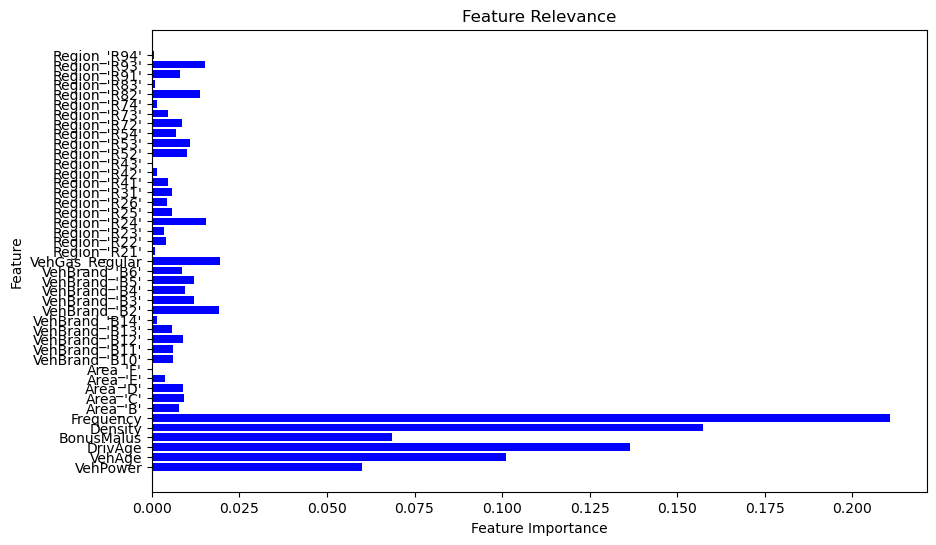

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, explained_variance_score

# Assuming X contains features and y contains the target variable 'PurePremium'
X = df.drop(columns=['PurePremium'])
y = df['PurePremium']

# Splitting the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Define hyperparameters for Random Forest
n_estimators = 100  # Number of trees in the forest
max_depth = 40  # Maximum depth of the trees
min_samples_split = 2  # Minimum number of samples required to split a node
min_samples_leaf = 1  # Minimum number of samples required at each leaf node

# Initialize Random Forest regressor
rf_reg = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                random_state=0)

# Fit the Random Forest model
rf_reg.fit(X_train, y_train)

# Get feature names
feature_names = X.columns

# Get feature importances
feature_importances = rf_reg.feature_importances_

# Plot feature relevance
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(feature_names)), feature_importances, color='blue')
plt.yticks(np.arange(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Relevance')
plt.show()


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, explained_variance_score


X = df.drop(columns=['PurePremium'])
y = df['PurePremium']

# Splitting the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Define hyperparameters for Random Forest
n_estimators = 100  # Number of trees in the forest
max_depth = 40  # Maximum depth of the trees
min_samples_split = 2  # Minimum number of samples required to split a node
min_samples_leaf = 1  # Minimum number of samples required at each leaf node

# Initialize Random Forest regressor
rf_reg = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                random_state=0)

# Fit the Random Forest model
rf_reg.fit(X_train, y_train)

# Predictions on the validation set
y_pred_val = rf_reg.predict(X_val)

# Calculate evaluation metrics for validation set
mae_val = mean_absolute_error(y_val, y_pred_val)
mse_val = mean_squared_error(y_val, y_pred_val)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, y_pred_val)
medae_val = median_absolute_error(y_val, y_pred_val)
explained_var_val = explained_variance_score(y_val, y_pred_val)

print("\nValidation Error Metrics:")
print("Mean Absolute Error:", mae_val)
print("Mean Squared Error:", mse_val)
print("Root Mean Squared Error:", rmse_val)
print("R-squared:", r2_val)
print("Median Absolute Error:", medae_val)
print("Explained Variance Score:", explained_var_val)

# Predictions on the test set
y_pred_test = rf_reg.predict(X_test)

# Calculate evaluation metrics for test set
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)
medae_test = median_absolute_error(y_test, y_pred_test)
explained_var_test = explained_variance_score(y_test, y_pred_test)

print("\nTesting Error Metrics:")
print("Mean Absolute Error:", mae_test)
print("Mean Squared Error:", mse_test)
print("Root Mean Squared Error:", rmse_test)
print("R-squared:", r2_test)
print("Median Absolute Error:", medae_test)
print("Explained Variance Score:", explained_var_test)



Validation Error Metrics:
Mean Absolute Error: 0.8193141377945106
Mean Squared Error: 1.3882042492234223
Root Mean Squared Error: 1.1782207981628157
R-squared: 0.09337803694690583
Median Absolute Error: 0.51693882192188
Explained Variance Score: 0.09383576360587431

Testing Error Metrics:
Mean Absolute Error: 0.7935893425376029
Mean Squared Error: 1.2971850954485051
Root Mean Squared Error: 1.1389403388450623
R-squared: 0.09045339996433044
Median Absolute Error: 0.5179207606875877
Explained Variance Score: 0.09192824063810356


# Generalized Additive Models

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from pygam import PoissonGAM
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, explained_variance_score


# Splitting the data into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=0)

# Define and fit Poisson GAM model
gam_model = PoissonGAM().fit(X_train.values, y_train.values)

# Predictions on the validation set
y_pred_val = gam_model.predict(X_val.values)

# Calculate evaluation metrics for validation set
mae_val = mean_absolute_error(y_val, y_pred_val)
mse_val = mean_squared_error(y_val, y_pred_val)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, y_pred_val)
medae_val = median_absolute_error(y_val, y_pred_val)
explained_var_val = explained_variance_score(y_val, y_pred_val)

print("\nValidation Error Metrics:")
print("Mean Absolute Error:", mae_val)
print("Mean Squared Error:", mse_val)
print("Root Mean Squared Error:", rmse_val)
print("R-squared:", r2_val)
print("Median Absolute Error:", medae_val)
print("Explained Variance Score:", explained_var_val)

# Predictions on the test set
y_pred_test = gam_model.predict(X_test.values)

# Calculate evaluation metrics for test set
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)
medae_test = median_absolute_error(y_test, y_pred_test)
explained_var_test = explained_variance_score(y_test, y_pred_test)

print("\nTesting Error Metrics:")
print("Mean Absolute Error:", mae_test)
print("Mean Squared Error:", mse_test)
print("Root Mean Squared Error:", rmse_test)
print("R-squared:", r2_test)
print("Median Absolute Error:", medae_test)
print("Explained Variance Score:", explained_var_test)



Validation Error Metrics:
Mean Absolute Error: 0.7820932557460148
Mean Squared Error: 1.2797708478667211
Root Mean Squared Error: 1.1312695734734144
R-squared: 0.16419477969461826
Median Absolute Error: 0.44951943921570203
Explained Variance Score: 0.16419627202866416

Testing Error Metrics:
Mean Absolute Error: 0.75376541498744
Mean Squared Error: 1.208108908239004
Root Mean Squared Error: 1.0991400767140664
R-squared: 0.1529109039125469
Median Absolute Error: 0.43443753010599373
Explained Variance Score: 0.1529744049861571
